# Jackson Gawarecki and Carmen Gascó Gálvez
## Team Project 2
### DS-160-02 Intro To Data Science
#### Spring 2022

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
dataset= pd.read_csv("water_potability.csv")

In [3]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

C:\Users\jack1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

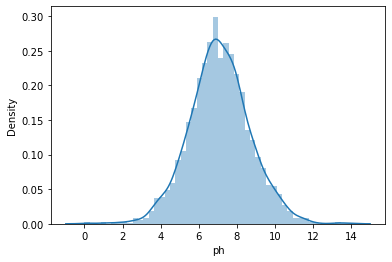

In [5]:
sns.distplot(dataset['ph']) 

In [6]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['ph']=imputer.fit_transform(dataset[['ph']])

C:\Users\jack1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sulfate', ylabel='Density'>

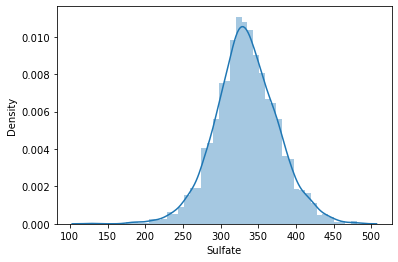

In [7]:
sns.distplot(dataset['Sulfate']) 

In [8]:
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['Sulfate']=imputer.fit_transform(dataset[['Sulfate']])

C:\Users\jack1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trihalomethanes', ylabel='Density'>

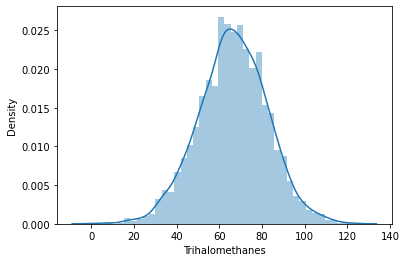

In [9]:
sns.distplot(dataset['Trihalomethanes']) 

In [10]:
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['Trihalomethanes']=imputer.fit_transform(dataset[['Trihalomethanes']])

In [11]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
dataset.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [13]:
X=dataset[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y=dataset[['Potability']]

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.35,random_state=0)

In [81]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\jack1\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [84]:
print(classifier.predict(sc.transform([[6.50648776650246, 202.285937949591, 17087.0769018372, 6.20198276732331, 326.662368312598, 481.77193425228, 16.53518592718, 46.2057479107106, 3.54877558874773
]])))

[0]


In [85]:
print(classifier.predict(sc.transform([[6.643935775,151.8896001,10909.19459,3.749625148,240.9367221,437.9090052,15.26474235,64.2039637,3.812952926]])))

[0]


In [86]:
print(classifier.predict(sc.transform([[5.03377399,155.3214775,34971.80748,7.121477448,320.115497,500.6373262,18.31249854,63.19330599,3.244948477]])))

[0]


In [87]:
print(classifier.predict(sc.transform([[6.912607562,155.7404952,17973.17886,4.916302562,275.9082279,439.6480512,18.38071193,55.50746847,2.612248953]])))

[0]


In [88]:
print(classifier.predict(sc.transform([[7.977635991,245.8951304,32170.06916,9.635636083,399.5831549,473.6624528,11.7283382,23.8170199,3.5521295]])))

[0]


In [89]:
print(classifier.predict(sc.transform([[7.12942473,178.3723523,25840.57889,7.487823264,312.9827267,323.2989152,16.40615622,69.15760946,3.418610803]])))

[0]


In [90]:
y_pred=classifier.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay


In [92]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[708   1]
 [431   5]]


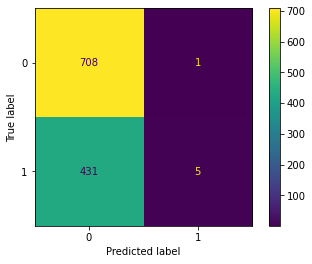

In [93]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

### True Negative (TN)= 399
### True Positive (TP)= 0 
### False Positive (FP)= 0 
### False Negative (FN)= 255 

In [94]:
accuracy_score(y_test,y_pred)

0.622707423580786